In [ ]:
# using rasterio packages, missing netCDF4. For export of netCDF file, see conversion2

In [1]:
import xshape
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy
import cartopy.crs as ccrs
import pandas as pd
from netCDF4 import Dataset

In [3]:
sf_dir = 'World_EEZ_v10_20180221_HR_0_360/'
fields, polygons = xshape.parse_shapefile(
    sf_dir + 'World_EEZ_v10_2018_0_360',
    encoding='latin1')

In [4]:
fields

<xarray.Dataset>
Dimensions:     (shape: 283)
Coordinates:
  * shape       (shape) int64 0 1 2 3 4 5 6 7 ... 276 277 278 279 280 281 282
Data variables:
    cat         (shape) <U90 '45' '229' '253' '2' ... '249' '97' '57' '267'
    MRGID       (shape) <U90 '8323.0' '26526.0' '48957.0' ... '8339.0' '48975.0'
    GeoName     (shape) <U90 'Australian Exclusive Economic Zone' ... 'Joint regime area Iceland / Norway (Jan Mayen)'
    MRGID_Ter1  (shape) <U90 '2147.0' '26525.0' '8599.0' ... '8610.0' '2129.0'
    Pol_type    (shape) <U90 '200NM' '200NM' '200NM' ... '200NM' 'Joint regime'
    MRGID_Sov1  (shape) <U90 '2147.0' '15.0' '2204.0' ... '17.0' '2129.0'
    Territory1  (shape) <U90 'Australia' 'Sint-Eustatius' ... 'Iceland'
    ISO_Ter1    (shape) <U90 'AUS' 'BES' 'GUM' 'NLD' ... 'PSE' 'BRA' 'ATF' 'ISL'
    Sovereign1  (shape) <U90 'Australia' 'Netherlands' ... 'France' 'Iceland'
    MRGID_Ter2  (shape) <U90 '0.0' '0.0' '0.0' '0.0' ... '0.0' '0.0' '5343.0'
    MRGID_Sov2  (shape) <U90 

In [5]:
field_ids = fields['MRGID'].data.astype(float).astype(int)
field_iso = fields['ISO_Ter1'].data
field_new_id = np.arange(len(fields['MRGID']))
eez_df = pd.DataFrame(zip(field_ids, field_iso), columns=['MRGID','ISO'])
eez_df['ID'] = field_new_id
eez_df.set_index('MRGID', inplace=True)
eez_df.head()

,ISO,ID
MRGID,,
8323,AUS,0
26526,BES,1
48957,GUM,2
5668,NLD,3
8394,COG,4


In [6]:
eez_tiff = xr.open_rasterio('eez.tiff')

In [12]:
EEZ = np.copy(eez_tiff[0, :, :])
for k, v in eez_df['ID'].to_dict().items(): EEZ[eez_tiff[0, :, :]==k] = v
lats = eez_tiff['y']
lons = eez_tiff['x']

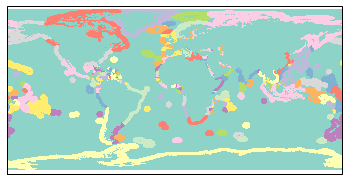

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
plt.pcolormesh(lons, lats, EEZ, cmap='Set3')
plt.show()

In [16]:
EEZ_dict = {
    'lats': lats,
    'lons': lons,
    'EEZ': EEZ,
    'fields': fields,
    'df': eez_df
}

In [18]:
import pickle

In [ ]:
outfile = open('')
pickle.dump(EEZ_dict, '')
EEZ_dict